# Project: Classification - Loan Eligibility Prediction<br>
by Adam M. Lang<br>


----
## Context: 
-------

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

---------
## Objective:
------------
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

--------
## Attributes Information:
------------

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N)

---------------------------

In [370]:
#from google.colab import drive
#drive.mount('/content/drive')
#I did not need to use google.colab for this exercise, I used Jupyter Notebooks in the Anaconda Platform. 

### Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn.metrics import recall_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
df.shape

(614, 13)

### Exploring data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [6]:
#Lets analysze the distribution of the various attribute

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can't happen so no need to fill these values`

In [7]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continuous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [8]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


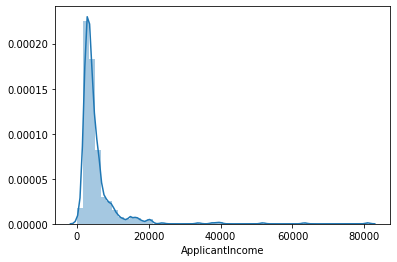

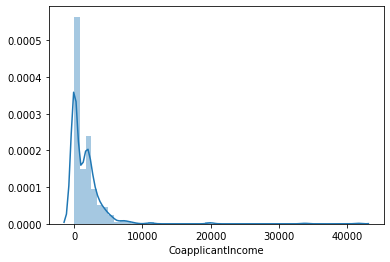

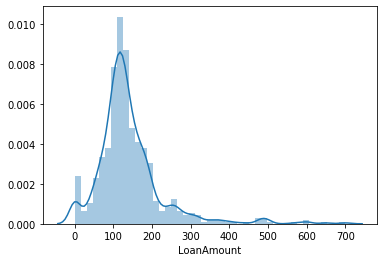

In [9]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [10]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [11]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [12]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

### Generate the countplots for all the categorical columns

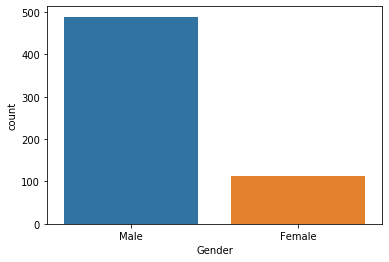

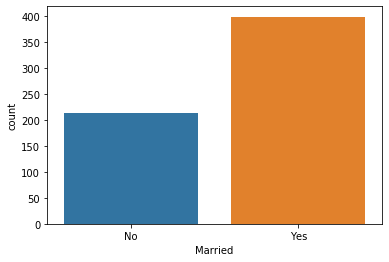

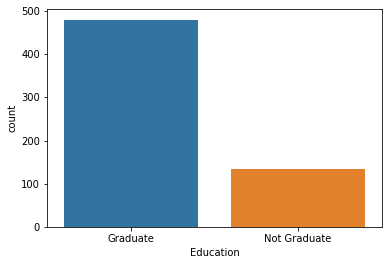

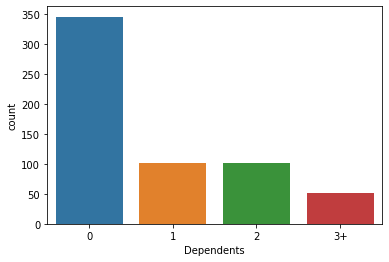

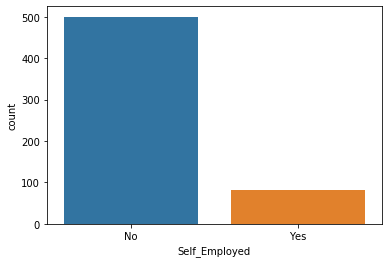

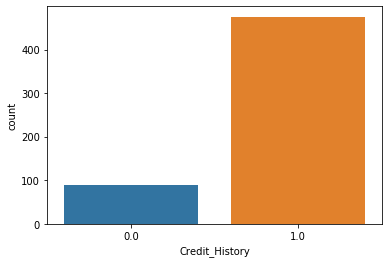

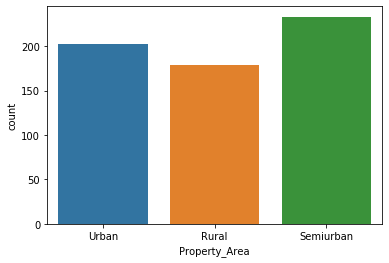

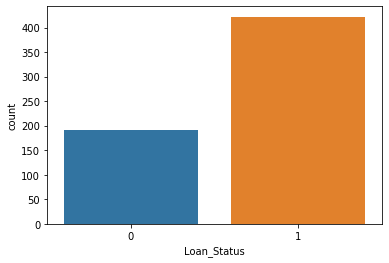

In [13]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(x=i,data=cr_df)
    plt.show()


### Calculate proportions of 1s and 0s in loan status and comment on the error rate if our model predicted everyone as eligible for loan

In [14]:
# Calculate baseline proportion. Comment on the error rate if our model predicted everyone as eligible for a loan.

#Baseline value counts
print(f"Baseline value counts")
print(cr_df['Loan_Status'].value_counts())

#Baseline Proportions
print(f"Baseline Proportions in percentage")
print(cr_df['Loan_Status'].value_counts(normalize=True)*100)


Baseline value counts
1    422
0    192
Name: Loan_Status, dtype: int64
Baseline Proportions in percentage
1    68.729642
0    31.270358
Name: Loan_Status, dtype: float64


**Insights:**
* There are about 69% or 422 people out of 614 that were approved for a loan. 
* The error rate was low with only 31% not approved for a loan. 

### Null Values Treatment

- Fill Credit history and Dependents null values with 0
- Fill self employed null values with 'No'
- Fill null values in gender where CoapplicantIncome is 0 with female and all other missing values as males. Comment on why this makes sense.

In [15]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#check value_counts of CoapplicantIncome
cr_df['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [17]:
#check value counts of Credit_History
cr_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
#check value counts of Dependents
cr_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
#check value counts of Self Employed
cr_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
#check cr_df head
cr_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1


In [21]:
# Your code here for all the requirements above. Use more cells if required.
cr_df['Credit_History'].fillna(value=0.0,inplace=True)
cr_df['Dependents'].fillna(0,inplace=True)
cr_df['Self_Employed'].fillna(value='No',inplace=True)


#check if null values still present
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
#write a function to Fill null values in gender 
#where CoapplicantIncome is 0 with female and all other missing values as males. Comment on why this makes sense.
def f(x):
    if x['CoapplicantIncome'] == 0.0: return 'Female'
    elif x['CoapplicantIncome'] != 0.0: return 'Male'


cr_df['Gender'] = cr_df.apply(f, axis=1)

In [23]:
#check df outcome
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Female,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Female,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1


In [24]:
#check nulls again
cr_df.isnull().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**insights**
* It makes sense that CoapplicantIncome when 0 is female the rest would be automatically be Male. We can assume it is 0 because females are either not married and/or there is no CoapplicantIncome or the CoapplicantIncome is listed under their Male spouse. 
* We can see after dealing with null values there just remains 3 nulls in the Married column. 

In [25]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [26]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Female,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Property_Area is Urban then mostly they are married.(mode)`
- There are 3 NaN values noted for Marital status and we will replace these with the mode. 

In [27]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [28]:
#check null values one more time
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are now no null values within the dataset. 

### Bivariate Analysis

- Draw a pairplot with Loan_Status hue. Comment on the visualisation
- Use group by on loan status and figure out the mean and median values of other numerical features per loan status category.
- Create a cross tab for dependents and loan status and state on the findings
- Create a cross tab for the property type and loan status and state the findings


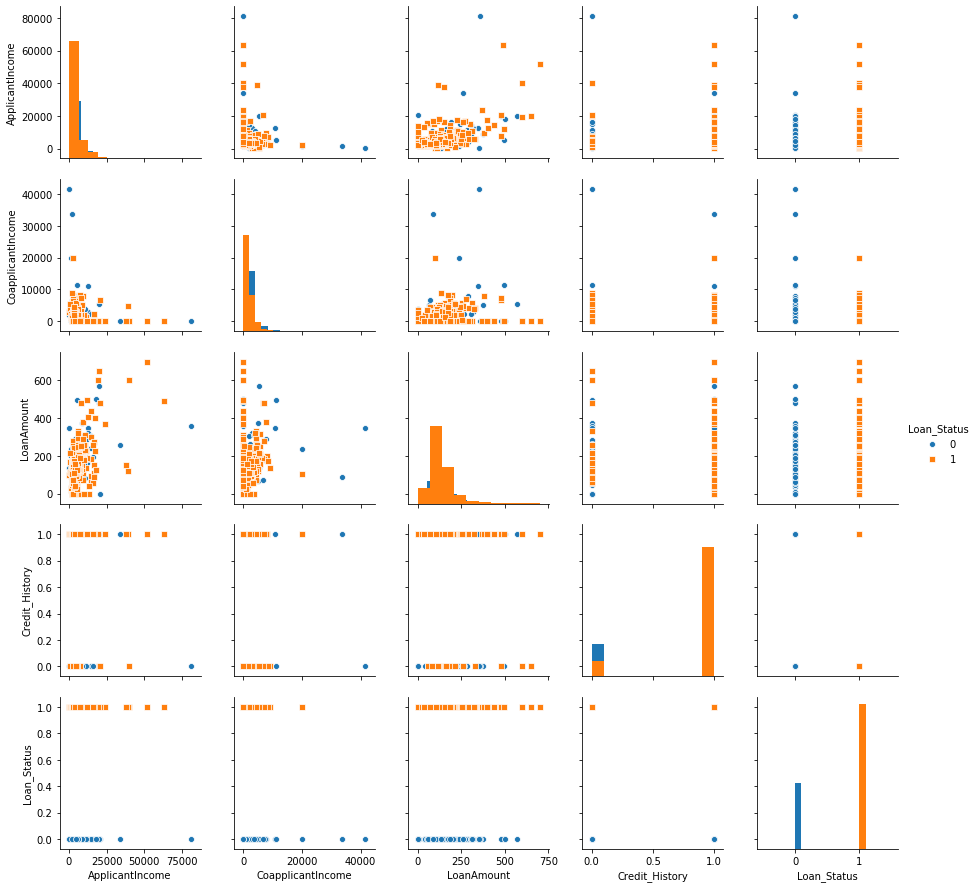

In [29]:
# Your Code here for the pairplot
sns.pairplot(data=cr_df,hue='Loan_Status',diag_kind='hist',markers=["o","s"])

plt.show()

**insights**
* Customers with an approved loan have a higher CoapplicantIncome. 
* Customers with an approved loan seem to also have a lower Applicantincome. 
* Credit_History with approved loan seems to have a higher loan amount as well. 
* Customers with an approved loan have a higher loan amount. 
* Customers who do not have their loan approved seem to have a lower loan amount. 

In [30]:
cr_df.groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,5446.078125,1877.807292,142.557292,0.505208
1,5384.068720,1504.516398,140.533175,0.895735


**insight**
* The mean ApplicantIncome, CoapplicantIncome, and LoanAmount all appear to be higher for those not approved for a loan. 
* The Credit_History appears to be higher/better for those approved for a loan. 

In [31]:
# groupby median loan status
cr_df.groupby(['Loan_Status']).median()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,3833.5,268.0,126.5,1.0
1,3812.5,1239.5,125.0,1.0


**insight**
* The median ApplicantIncome is very similar for both not approved (3833.5) and those approved (3812.5). 
* The median CoapplicantIncome is almost 4 times higher for customers approved for a loan than those not approved. 
* The median LoanAmount is virtually the same for those not approved (126.5) and those approved (125.0). Surprisingly those not approved have a slightly higher loan amount. 
* The median Credit_History is the same at 1.0. 

In [32]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Gender,,
Female,0.351648,0.648352
Male,0.281525,0.718475


**insight**
* Females have a higher percentage 35% than Males 28% that are not approved for a loan. 
* Males have a higher percentage at 71.8% than Females at 64.8% that are approved for a loan. 

In [33]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [34]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


**insight**
* Education status shows us that Not Graduate has a higher percentage (38.8%) not approved for a loan than Graduate (29.1%).
* Graduate has a higher percentage approved for a loan at 70.8% than Not Graduate at 61.1%. 

In [35]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [36]:
# Your code here for cross tabs
#Create a cross tab for dependents and loan status and state on the findings
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Dependents,,
0,0.031250,0.021327
0,0.557292,0.563981
1,0.187500,0.156398
2,0.130208,0.180095
3+,0.093750,0.078199


**insight**
* Number of Dependents shows us a trend that the highest percentage of people that were not approved for a loan have no dependents. The more dependents you have the lower the percentage not approved. 
* For those approved for a loan the trend is nearly the same with the most being those customers that have no dependents being the group most approved for a loan. 
* An interesting finding is that those customers that have 3 or more dependents were almost equally as likely to be not approved and approved for a loan. 

In [37]:
#Create a cross tab for the property type and loan status and state the findings
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


**insight**
* Customers in Semiurban areas were the most approved for a loan at 42.4% followed by Urban at 31.5%, and lastly Rural at 26%. 
* Customers in Rural and Urban areas were equally as likely to not be approved for a loan with the same reported percentage of 35.9%, followed by Semiurban at 28.1%. 

### Data Preparation
- Split the data into independent and dependent variables 
- create dummy variables wherever necessary and add in the independent features set

In [38]:
# Define X and Y variables

# Uncomment below to answer
X = cr_df.drop('Loan_Status',axis=1)
Y = cr_df['Loan_Status'].astype('category')     

In [39]:
# Convert categorical vriables to dummy variables

#Uncomment below to answer
X = pd.get_dummies(X, drop_first=True)

In [40]:
## Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

### Model building using Logistic Regression from Sklearn

- Fit a Logistic Regression model on all of the train data 
- Predict on the test data and append the predictions as a column in the test set 
- Complete the function to draw a confusion matrix and pass on the test set predictions along with actual values to generate the confusion matrix as a heatmap 
- Generate the classification report using the classification_report function
- Store the model coeffs in a dataframe 

In [41]:
from sklearn.metrics import classification_report, classification_report
from sklearn.linear_model import LogisticRegression

# Uncomment and answer below
logreg = LogisticRegression(random_state=42,fit_intercept=False)
logreg.fit(X_train,Y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Uncomment to answer
y_predict = logreg.predict(X_test)   # Predicting the target variable on test data

In [43]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()

# Uncomment below to answer
z['Observed Loan Status'] = Y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221,0.0,60,0.0,0,1,1,0,0,0,0,0,0,1,0,0
109,2071,754.0,94,1.0,1,1,0,0,0,1,1,0,1,0,1,1
569,3166,2064.0,104,0.0,1,1,1,0,0,0,0,0,0,1,0,0
330,4384,1793.0,117,1.0,1,0,0,1,0,0,0,0,0,1,1,1
407,2213,0.0,66,1.0,0,0,1,0,0,0,1,0,0,0,1,1


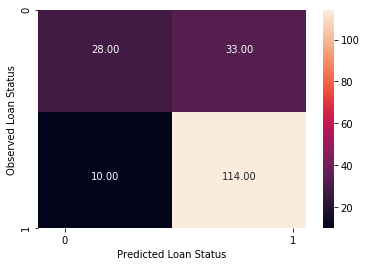

In [66]:
## function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix

# Uncommment below to answer

def draw_cm( actual, predicted ):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.xticks([0.2,1.9])
    plt.yticks([0.2,1.9])
    plt.ylabel('Observed Loan Status')
    plt.xlabel('Predicted Loan Status')
    plt.show()
    
    

draw_cm(Y_test,y_predict) #Call function

**insight**
* The confusion matrix for the logistic regression model shows us that the number of True Positives is 114.
* The number of True Negatives is 28.
* The number of False Positives is 33, this is a low type I error rate. 
* The number of False Negatives is 10, this is a low type II error rate. 

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))


              precision    recall  f1-score   support

           0       0.74      0.46      0.57        61
           1       0.78      0.92      0.84       124

    accuracy                           0.77       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185



**insights for logistic regression**
* The Precision is the ratio between the true positives and all the positives also known as the positive predictive value. It gives us a measure of the relevant data points. The Precision here for correctly predicting loan approval (1) is 0.78 which is excellent. 
* The Recall is the measure that correctly identifies true positives. The number is quite high here at 0.92 for predicting loan approval. 
* The f1-score is the harmonic mean of the precision and recall or the bias-variance trade-off. A value closer to 1 is good and here we have a score of 0.84 for predicting loan approval which is good. 
* Accuracy is the ratio of the total number of correct predictions and the total number of predictions. The higher the better. The value here for loan approval prediction is 0.77 which is quite good. 

In [69]:
# Coefficients 
# Uncomment below to answer
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(pd.DataFrame(logreg.coef_).T),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
3,Credit_History,1.68
7,Dependents_1,0.73
6,Dependents_0,0.57
10,Education_Not Graduate,0.53
12,Property_Area_Semiurban,0.52
9,Dependents_3+,0.40
4,Gender_Male,0.37
5,Married_Yes,0.30
8,Dependents_2,0.20
11,Self_Employed_Yes,0.09


**insights**
* We use the coefficient to determine whether a change in a predictor variable makes the event more likely or less likely.
* As we can see the highest coefficient value is for Credit_History at 1.68 which means this is perhaps the most important predictor of whether a customer has their loan approved or not. 
* Other important predictors are having 1 Dependent, having 0 Dependents, Not Graduate Education and Property Area Semiurban.
* The least important predictors were LoanAmount, CoapplicantIncome, and ApplicantIncome. 

### kNN model Building

- For every value of K, split the train set into new train and validation set 30 times and take the average of the error on these train and the validation sets per k. Create a dictionary that stores the average train and validation error for all Ks from 1 to 14. 

- Use the dictionary to plot the average train vs the validation set error for all ks.

- Choose the apt k from the plot where the two errors are comparable and fit the entire training set and predict on the test set.

- Store the results of the test set in the dataframe created above.

- Draw confusion matrix calling the function created above.

- print the classification report
- Provide business insights for the entire modelling process (including logistic regression)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

# for loops and instantiate knn model

for k in range(1,15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.20)
#     #let us scale the data. Notice the scaling done in the videos.
        x_train = ss.fit_transform(x_train)
        x_val = ss.transform(x_val) # transform the validation set
        knn.fit(x_train, y_train)
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.34302325581395343],
 2: [0.15898931000971814, 0.42674418604651165],
 3: [0.18960155490767738, 0.3232558139534883],
 4: [0.2145772594752187, 0.34263565891472864],
 5: [0.21758989310009716, 0.31550387596899215],
 6: [0.22157434402332363, 0.3147286821705426],
 7: [0.2377065111758989, 0.30426356589147285],
 8: [0.23566569484936842, 0.29844961240310075],
 9: [0.24655004859086496, 0.3007751937984496],
 10: [0.24101068999028186, 0.2937984496124031],
 11: [0.2592808551992225, 0.29961240310077514],
 12: [0.2517978620019436, 0.3116279069767442],
 13: [0.2642371234207969, 0.30465116279069765],
 14: [0.259086491739553, 0.3077519379844961]}

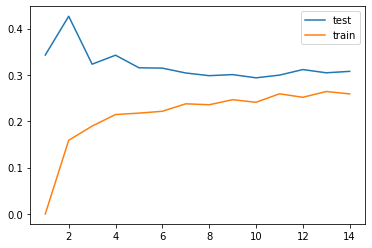

In [71]:
# Extracting k and the test error in a list for easy plotting

kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error error

#Uncomment and answer

plt.plot(kltest, vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

The best value of k appears to be 11 as it has the least error rate in the validation data. 

In [75]:
#Uncomment and answer

knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(X_train, Y_train)

y_pred2= knn.predict(X_test)
z["5NN predictions"]  = y_pred2



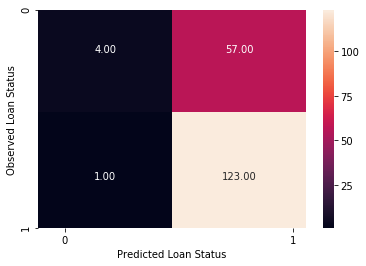

In [76]:
#Your code here for drawing the confusion matrix
draw_cm(Y_test,y_pred2)

**insights for confusion matrix**
* The confusion matrix for the KNN model shows us that the number of True Positives is 123.
* The number of True Negatives is 4.
* The number of False Positives is 57, this is a higher type I error rate.
* The number of False Negatives is 1, this is a low type II error rate.

In [77]:
# Print the classification report here

print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.07      0.12        61
           1       0.68      0.99      0.81       124

    accuracy                           0.69       185
   macro avg       0.74      0.53      0.47       185
weighted avg       0.72      0.69      0.58       185



**insights for KNN**
* The Precision is the ratio between the true positives and all the positives also known as the positive predictive value. It gives us a measure of the relevant data points. The Precision here for correctly predicting loan approval (1) is 0.68 which is .10 less than for logistic regression. 
* The Recall is the measure that correctly identifies true positives. The number is much higher than for logistic regression and is 0.99 for predicting loan approval.
* The f1-score is the harmonic mean of the precision and recall or the bias-variance trade-off. A value closer to 1 is good and here we have a score of 0.81 for predicting loan approval which is good but less than the f1 for logistic regression.
* Accuracy is the ratio of the total number of correct predictions and the total number of predictions. The higher the better. The value here for loan approval prediction is 0.69 which is .08 less than the accuracy for logistic regression hinting at a slightly poorer prediction accuracy. 

## <a id = "link8"></a>Business Insights 

*Add insights here and comment on the best model*

* I believe we can say the best overall model was logistic regression. It had a better accuracy of 0.77 compared to the KNN accuracy of 0.69. While the logistic regression model had less true positives (114) than KNN (123), the number of false positives was much higher for KNN at 57 compared to 33 for logistic regression. This means that the KNN model is more likely to falsely predict a customer that qualifies for loan acceptance. 
* The Precision was the best for the logistic regression model at 0.78 compared to 0.68 for KNN. This means that the positive predictive value is much stronger for this model. 
* The coefficients from the logistic regression model gave use some good business insight as to where we should focus our original problem which was to identify the customers segments, those are eligible for loan amount so we can specifically target these customers. The highest coefficient was for Credit History, followed by 1 Dependent, having 0 Dependents, Not Graduate Education and Property Area Semiurban. We can use this information to focus our marketing campaigns on these groups of customers and their specific attributes to determine who will more likely qualify for a loan. 
* We also learned the coefficient values that were not significant including  LoanAmount, CoapplicantIncome, and ApplicantIncome, as well as Property Area Urban. We know these are less likely to help us in predicting if a customer qualifies for a loan but are also important perhaps for future study as to whether they become more relevant over time. 